# 1. Decision Trees

The code below loads dataset which captures key information about startups, including R&D spend, Administration cost, Marketing spend, State and Profit. We’ll use this dataset in the next few exercises to build and compare nonparametric regression models.

It also stores the Profit column in the response variable and the remaining columns in the predictors variable. It then splits each of these into training and testing versions.

Finally, it creates dummy variables for the State column.

You'll use this data to build a regression model that predicts profit given expenditure on these factors.

Run the code below to load this and create the variables mentioned above.

In [1]:
import pandas as pd
from urllib.request import urlretrieve

#Reads in the dataset from a URL
url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/60/startups"
urlretrieve(url, "startups_dataset.csv")
startups = pd.read_csv("startups_dataset.csv")

response = startups["Profit"]
predictors = startups.drop("Profit",axis=1)

#Gets dummy variables for the State column
predictors=pd.get_dummies(predictors,drop_first=True)

#Gets training and testing versions of each dataset
#Note that below we can assign multiple variables at once
#This works because we're assigning 4 variables and the output of the function is a list with 4 elements
from sklearn.model_selection import train_test_split
p_train, p_test, r_train ,r_test= train_test_split(predictors, response, test_size=0.1, random_state=50)

#Provides a preview of the whole dataset for reference
startups.head()

,Startup ID,R&D Spend,Administration,Marketing Spend,State,Profit
0,1,165349.20,136897.80,471784.10,New York,192261.83
1,2,162597.70,151377.59,443898.53,California,191792.06
2,3,153441.51,101145.55,407934.54,Florida,191050.39
3,4,144372.41,118671.85,383199.62,New York,182901.99
4,5,142107.34,91391.77,366168.42,Florida,166187.94


<hr style="height:2px;border-width:0;color:black;background-color:black">

Build a decision tree regression model that predicts the profit of a startup based on expenditure and location.

In [2]:
#First we import the function
from sklearn.tree import DecisionTreeRegressor
#Then we store it in a function, using the default configurations
regressor = DecisionTreeRegressor()
#Then we fit it using the training variables
regressor.fit(p_train, r_train)

DecisionTreeRegressor()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Create a variable called predictions that stores the model's predictions for each value in the testing version of the predictors variable.

In [3]:
#We can make these predictions by using the .predict() method
predictions = regressor.predict(p_test)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Output the mean absolute error and root mean squared error for the model. This will be used later to compare its performance compared to other models.

In [4]:
#We import the mean_absolute_error, mean_squared_error and sqrt functions
from sklearn.metrics import mean_absolute_error, mean_squared_error
from  numpy import sqrt

#We use the mean_absolute_error on the response test data and the predictions data
print('Mean Absolute Error:', mean_absolute_error(r_test, predictions))
#We use the mean_squared_error on the same data and then get the square root to get root mean squared error
print('Root Mean Squared Error:', sqrt(mean_squared_error(r_test, predictions)))

Mean Absolute Error: 4017.3679999999936
Root Mean Squared Error: 5414.444144656029


<hr style="height:2px;border-width:0;color:black;background-color:black">

# 2. K-nearest Neighbors Regression

Build a k-nearest neighbors regression model that predicts the profit of a startup based on expenditure and location.

In [5]:
#First we import the function
from sklearn.neighbors import KNeighborsRegressor
#Then we store it in a function, using the default configurations
regressor = KNeighborsRegressor()
#Then we fit it using the training variables
regressor.fit(p_train, r_train)

KNeighborsRegressor()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Create a variable called predictions that stores the model's predictions for each value in the testing version of the predictors variable.

In [6]:
#We can make these predictions by using the .predict() method
predictions = regressor.predict(p_test)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Output the mean absolute error and root mean squared error for the model.

In [7]:
#We import the mean_absolute_error, mean_squared_error and sqrt functions
from sklearn.metrics import mean_absolute_error, mean_squared_error
from  numpy import sqrt

#We use the mean_absolute_error on the response test data and the predictions data
print('Mean Absolute Error:', mean_absolute_error(r_test, predictions))
#We use the mean_squared_error on the same data and then get the square root to get root mean squared error
print('Root Mean Squared Error:', sqrt(mean_squared_error(r_test, predictions)))

Mean Absolute Error: 11693.1244
Root Mean Squared Error: 13664.61340001483


<hr style="height:2px;border-width:0;color:black;background-color:black">

# 3. Support Vector Regression

Build a support vector regression model that predicts the profit of a startup based on expenditure and location.

In [8]:
#First we import the function
from sklearn.svm import SVR
#Then we store it in a function, using the default configurations
regressor = SVR()
#Then we fit it using the training variables
regressor.fit(p_train, r_train)

SVR()

<hr style="height:2px;border-width:0;color:black;background-color:black">

Create a variable called predictions that stores the model's predictions for each value in the testing version of the predictors variable.

In [9]:
#We can make these predictions by using the .predict() method
predictions = regressor.predict(p_test)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Output the mean absolute error and root mean squared error for the model.

In [10]:
#We import the mean_absolute_error, mean_squared_error and sqrt functions
from sklearn.metrics import mean_absolute_error, mean_squared_error
from  numpy import sqrt

#We use the mean_absolute_error on the response test data and the predictions data
print('Mean Absolute Error:', mean_absolute_error(r_test, predictions))
#We use the mean_squared_error on the same data and then get the square root to get root mean squared error
print('Root Mean Squared Error:', sqrt(mean_squared_error(r_test, predictions)))

Mean Absolute Error: 36777.39779099337
Root Mean Squared Error: 44803.83127675284


<hr style="height:2px;border-width:0;color:black;background-color:black">

# 4. Logistic Regression

The code below loads a credit card default dataset that captures personal information as well as credit card payment history over 6 months. You'll use this code to predict if a customer is likely to default in the following month.

PAY_DELAY represents the cumulative number of months each person has made a delayed payment. BILL represents the sum of the bills of the 6 months. Paid represents the sum of money paid. Defaulted Next Month has 1 where the customer defaulted on the 7th month.

The code sets Defaulted Next Month as the response variable and the remaining columns as the predictors variable. The categorical features are converted to dummy features and both the response and predictors variables are split into training and testing variants.

Run the code below to load this and create the variables mentioned above.

In [11]:
import pandas as pd
from urllib.request import urlretrieve

#Reads in the dataset from a URL
url = "https://ac-101708228-virtuoso-prod.s3.amazonaws.com/uploads/download/111/credit_card_default.csv"
urlretrieve(url, "credit_card_default.csv")
credit_card_default = pd.read_csv("credit_card_default.csv",index_col=0)

response = credit_card_default["Defaulted Next Month"]
predictors = credit_card_default.drop("Defaulted Next Month",axis=1)

#Gets dummy variables for the State column
predictors=pd.get_dummies(predictors,drop_first=True)

#Gets training and testing versions of each dataset
#Note that below we can assign multiple variables at once
#This works because we're assigning 4 variables and the output of the function is a list with 4 elements
from sklearn.model_selection import train_test_split
p_train, p_test, r_train ,r_test= train_test_split(predictors, response, test_size=0.1, random_state=50)

#Provides a preview of the whole dataset for reference
credit_card_default.head()

,Defaulted Next Month,Sex,Education level,Marriage,Age,Credit Card Limit,PAY_DELAY,BILL,PAID
ID,,,,,,,,,
1,1,Unspecified,High School,Married,24,20000,-2,7704,689
2,1,Unspecified,High School,Other,26,120000,2,17077,5000
3,0,Unspecified,High School,Other,34,90000,0,101653,11018
4,0,Unspecified,High School,Married,37,50000,0,231334,8388
5,0,Male,High School,Married,57,50000,0,109339,59049


<hr style="height:2px;border-width:0;color:black;background-color:black">

Check the continuous features in our data for multicollinearity. Remove any columns with an R score of <-0.8 or >0.8.

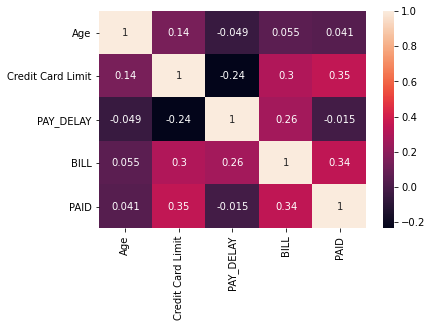

In [12]:
#Imports the library containing the heatmap function
import seaborn as sns

#Applies the corr method to the continuous features
#Stores the output in a variable called correlation_matrix
correlation_matrix = credit_card_default[["Age","Credit Card Limit","PAY_DELAY","BILL","PAID"]].corr()
#The heatmap function displays the correlation matrix in a format that's easier to interpret
sns.heatmap(correlation_matrix, annot=True);
#As we can see, there's no sign of multicollinearity
#This is because no 2 features have an R score of >0.8 or <-0.8

<hr style="height:2px;border-width:0;color:black;background-color:black">

Check that the continuous features in our data are directional.

<AxesSubplot:xlabel='Age', ylabel='Defaulted Next Month'>

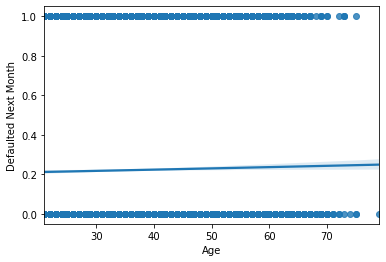

In [13]:
#We can use seaborn's regplot to check if a predictor feature is directional when compared to the response feature
sns.regplot(x= 'Age', y= 'Defaulted Next Month', data= credit_card_default, logistic=True)

<AxesSubplot:xlabel='Credit Card Limit', ylabel='Defaulted Next Month'>

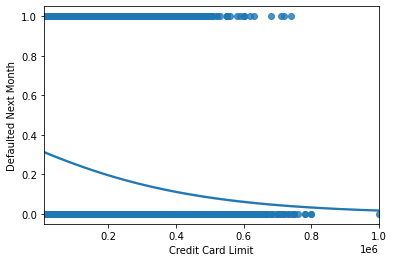

In [14]:
#We can use seaborn's regplot to check if a predictor feature is directional when compared to the response feature
sns.regplot(x= 'Credit Card Limit', y= 'Defaulted Next Month', data= credit_card_default, logistic=True)

<AxesSubplot:xlabel='PAY_DELAY', ylabel='Defaulted Next Month'>

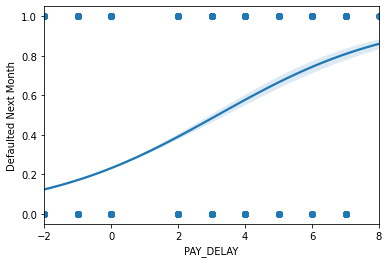

In [15]:
#We can use seaborn's regplot to check if a predictor feature is directional when compared to the response feature
sns.regplot(x= 'PAY_DELAY', y= 'Defaulted Next Month', data= credit_card_default, logistic=True)

<AxesSubplot:xlabel='BILL', ylabel='Defaulted Next Month'>

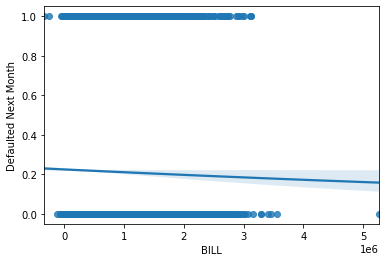

In [16]:
#We can use seaborn's regplot to check if a predictor feature is directional when compared to the response feature
sns.regplot(x= 'BILL', y= 'Defaulted Next Month', data= credit_card_default, logistic=True)

<AxesSubplot:xlabel='PAID', ylabel='Defaulted Next Month'>

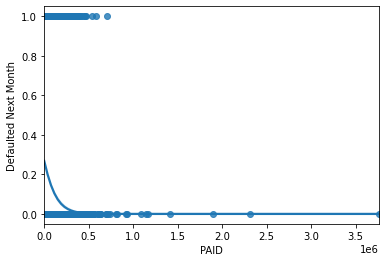

In [17]:
#We can use seaborn's regplot to check if a predictor feature is directional when compared to the response feature
sns.regplot(x= 'PAID', y= 'Defaulted Next Month', data= credit_card_default, logistic=True)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Build and train a logistic regression model.

In [18]:
#First we import the functions
from sklearn.linear_model import LogisticRegression
import numpy as np
#Then we store it in a function, using the default configurations
regressor = LogisticRegression(solver='liblinear')
#Then we fit it using the training variables
#We also need to use the ravel function on the response variable to avoid an error
regressor.fit(p_train, np.ravel(r_train))

LogisticRegression(solver='liblinear')

<hr style="height:2px;border-width:0;color:black;background-color:black">

Create a variable called predictions that stores the model's predictions for each value in the testing version of the predictors variable.

In [19]:
#We can make these predictions by using the .predict() method
predictions = regressor.predict(p_test)

<hr style="height:2px;border-width:0;color:black;background-color:black">

Output the precision, recall and accuracy values for the model. Add the argument zero_division=0 to the classification_report function to output a 0 instead of a divide by 0 error.

In [20]:
#We can use the classification_report function to check the precision, recall and accuracy values for the model
from sklearn.metrics import classification_report
#We'll set zero_division to 0 to avoid a zero division error
#This means the output of dividing a number by 0 will be 0
print(classification_report(r_test, predictions,target_names=["Paid","Defaulted"],zero_division=0))

              precision    recall  f1-score   support

        Paid       0.79      1.00      0.88      2356
   Defaulted       0.00      0.00      0.00       644

    accuracy                           0.79      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.62      0.79      0.69      3000

